<a href="https://colab.research.google.com/github/oktaw-g/AI/blob/main/P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

DATASET_PATH = "BreastCancerData.csv"

#Wczytanie danych

In [ ]:
# Wczytanie datasetu Breast Cancer
dataset = pd.read_csv(DATASET_PATH)

In [ ]:
# Informacje o zestawie danych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset = dataset.drop(columns="Unnamed: 32")

In [ ]:
DATASET_FEATURE_LABELS = {
    'radius_mean': 'Średnia odległość środka od obwodu',
    'texture_mean': 'Odchylenie standardowe skali szarości',
    'perimeter_mean': 'Średni rozmiar rdzenia',
    'area_mean': 'Średni obszar',
    'smoothness_mean': 'Średnia gładkość',
    'compactness_mean': 'Średnia ścisłość(Kulowatość)',
    'concavity_mean': 'concavity_mean',
    'concave points_mean': 'concave points_mean',
    'symmetry_mean': 'Średnia symetria',
    'fractal_dimension_mean': 'fractal_dimension_mean',
}

In [ ]:
# Zmiana nazwy kolumn
#dataset = dataset.rename(columns=DATASET_FEATURE_LABELS)
dataset.replace(to_replace=["M","B"], value = ['Złośliwy','Łagodny'], inplace=True)

#dataset['diagnosis'] = dataset['diagnosis'].astype('float')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Usunięcie zbędnych kolumn
dataset = dataset.drop(columns=['id','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
dataset = dataset.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])

#usunąć wszystkie worst
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


#Brakujące dane

In [ ]:
# Znalezienie brakujących danych
dataset.isnull().any()
# W rzędzie jest brakująca wartość
isnull = dataset.isnull().any(axis=1)
print(np.count_nonzero(isnull),"brakujących wartości.")
# Usunięcie rzędu
dataset = dataset.drop(np.asarray(isnull).nonzero()[0].tolist() ,axis=0)

0 brakujących wartości.


In [ ]:
# Podgląd pierwszych 10 rzędów
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,Złośliwy,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,Złośliwy,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,Złośliwy,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,Złośliwy,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,Złośliwy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,Złośliwy,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,Złośliwy,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,Złośliwy,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,Złośliwy,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,Złośliwy,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


#Wydzielenie zmiennej

In [ ]:
# Wydzielenie zmiennej zależnej (Y)
x,y = dataset.drop(columns=["diagnosis"]), dataset["diagnosis"]

In [ ]:
# Określenie liczby klas
counts = y.value_counts()
counts

,count
diagnosis,
Łagodny,357
Złośliwy,212


In [ ]:
# Współczynnik niezbalansowania
c_max, c_min = max(counts.values[0],counts.values[1]),min(counts.values[0],counts.values[1])
imbalance = c_max/c_min

print(f"Współczynnik niezbalansowania: {c_max} / {c_min} = {imbalance:.1f}")#zbiór jest delikatnie niezbilansowany 37% do 63%

Współczynnik niezbalansowania: 357 / 212 = 1.7


EDA

In [ ]:
# Podstawowa analiza statystyczna
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

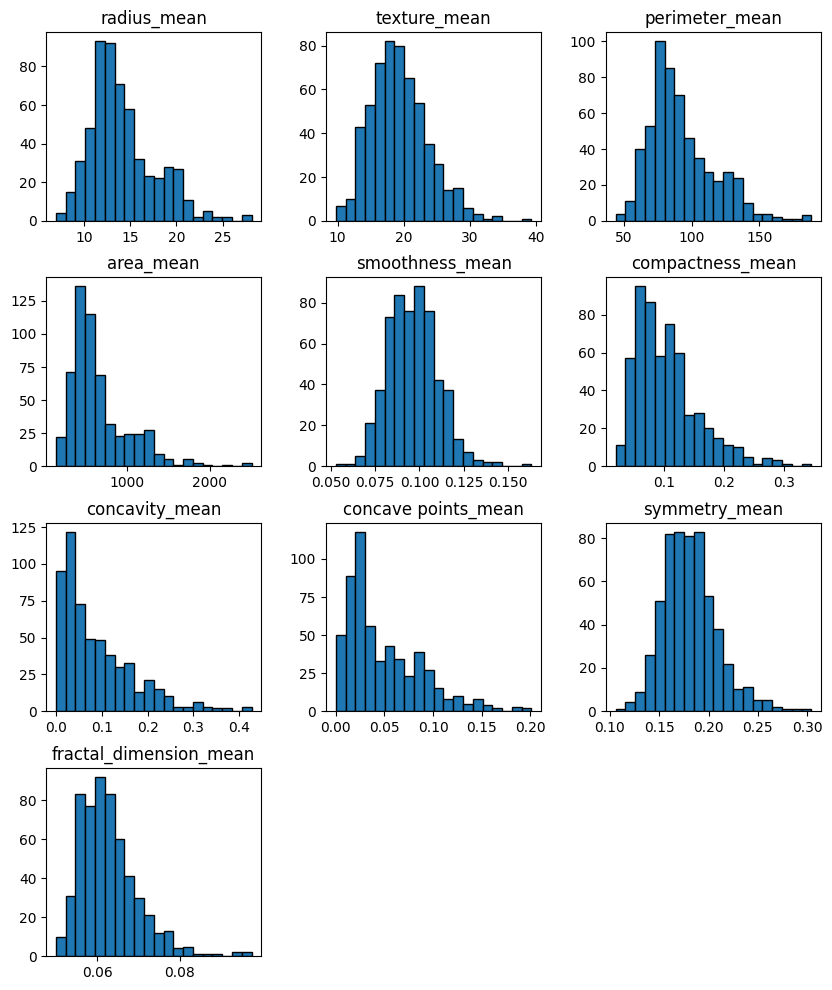

In [ ]:
# Histogramy zmiennych niezależnych
x.hist(figsize=(10,12), bins=20, edgecolor='black', grid=False)

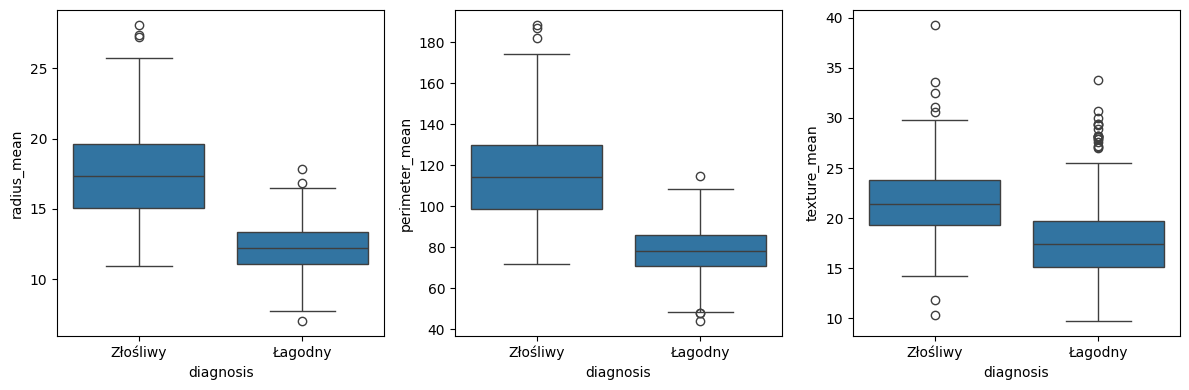

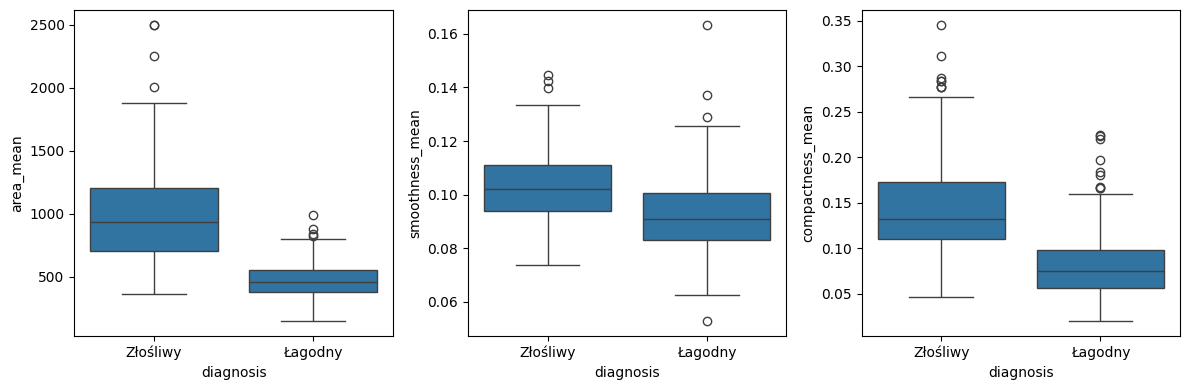

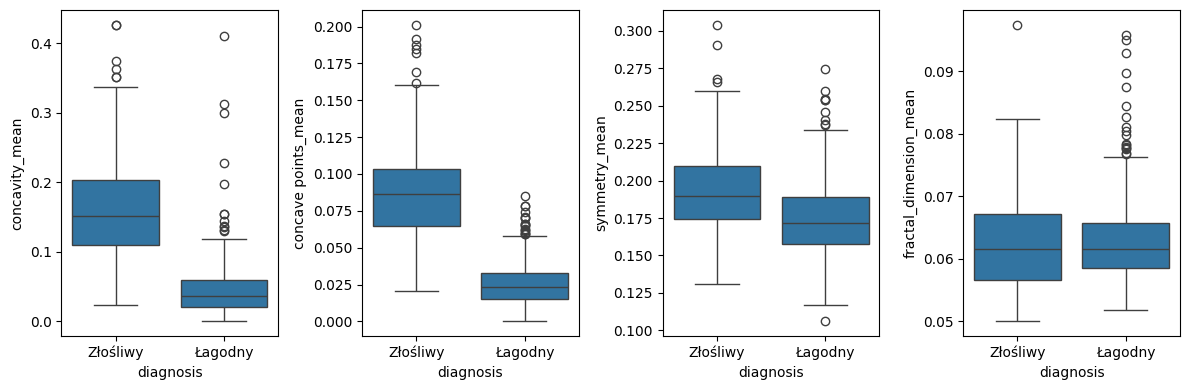

In [28]:
# Analiza BOXPLOT

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x=y, y=x["radius_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["perimeter_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["texture_mean"], ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x=y, y=x["area_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["smoothness_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["compactness_mean"], ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,4,figsize=(12,4))
sns.boxplot(x=y, y=x["concavity_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["concave points_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["symmetry_mean"], ax=axes[2])
sns.boxplot(x=y, y=x["fractal_dimension_mean"], ax=axes[3])
plt.tight_layout()
plt.show()


<Axes: >

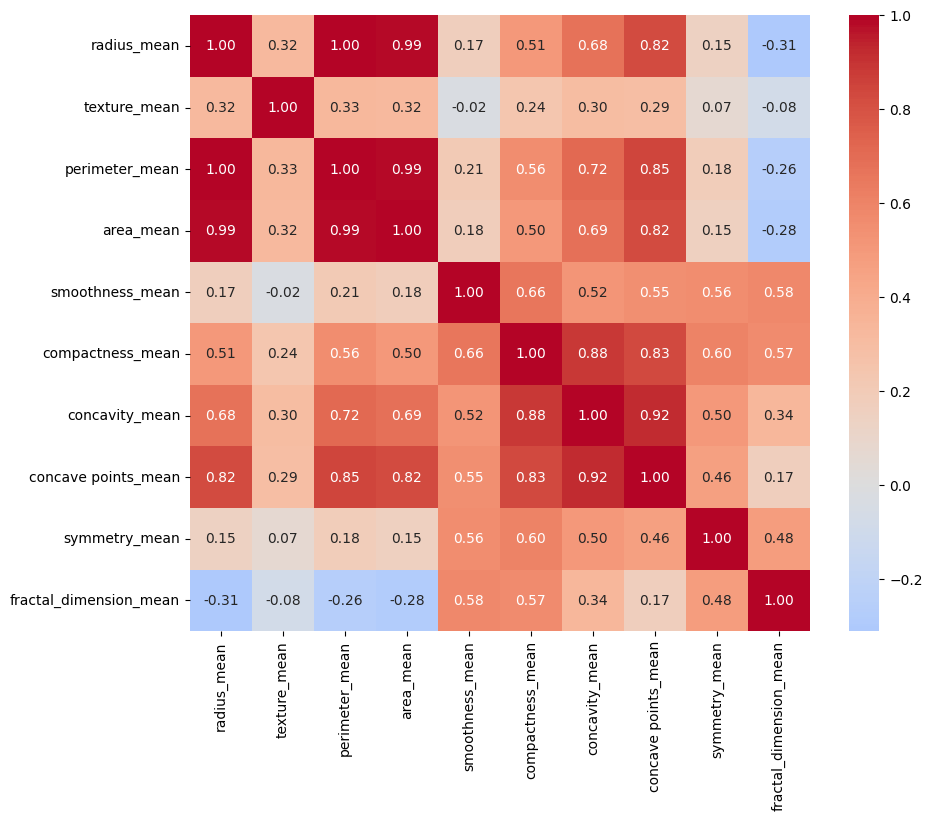

In [29]:
# Analiza korelacji pomiędzy zmiennymi

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(x.select_dtypes(exclude='object').corr(), ax=ax, annot=True, fmt=".2f", cmap="coolwarm", center=0)

#Klasyfikacja

In [30]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer


col_categorical = x.select_dtypes(include='object').columns
col_numerical = x.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

from  sklearn.preprocessing import LabelEncoder

# Enkodowanie zmiennej zależnej
le = LabelEncoder()
y = le.fit_transform(y)
y_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_name_mapping

{'Złośliwy': 0, 'Łagodny': 1}

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc = Pipeline([
    ('col_transformer', col_transformer),
    ('svc', SVC(kernel="linear", C=1.0)),
])

knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
])


#Walidacja krzyżowa

In [32]:
from sklearn.model_selection import cross_validate

SCORING = ('accuracy', 'recall', 'precision', 'f1')

results = cross_validate(svc, x, y, cv=5, scoring=SCORING)

print("=====\nSVC:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

results = cross_validate(knn, x, y, cv=5, scoring=SCORING)

print("=====\nk-NN:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

=====
SVC:
=====
fit_time: 0.010
score_time: 0.010
test_accuracy: 0.926
test_recall: 0.952
test_precision: 0.932
test_f1: 0.942
=====
k-NN:
=====
fit_time: 0.007
score_time: 0.017
test_accuracy: 0.935
test_recall: 0.949
test_precision: 0.948
test_f1: 0.948


#Gridsearch

In [33]:
# Listowanie parametrów SVC
svc['svc'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
# Listowanie parametrów k-NN
knn['knn'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [35]:
# Tuning hiperparametrów k-NN z wykorzystaniem GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
    'knn__metric': ['euclidean', 'cosine', 'cityblock', 'l1', 'l2', 'nan_euclidean'],
}
grid_search = GridSearchCV(knn, parameters)
grid_search.fit(x, y)

# Zastosowanie hiperparametrów
for param, val in grid_search.best_params_.items():
    knn.set_params(**{param: val})

grid_search.best_params_

{'knn__metric': 'cosine', 'knn__n_neighbors': 7}

In [36]:
# Tuning hiperparametrów SVC z wykorzystaniem GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'svc__C': list(np.arange(0.1, 2.1, 0.1)),
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x, y)

# Zastosowanie hiperparametrów
for param, val in grid_search.best_params_.items():
    svc.set_params(**{param: val})

grid_search.best_params_

{'svc__C': 1.8000000000000003, 'svc__kernel': 'rbf'}

In [37]:
results = cross_validate(svc, x, y, cv=5, scoring=SCORING)

print("=====\nSVC:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

results = cross_validate(knn, x, y, cv=5, scoring=SCORING)

print("=====\nk-NN:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

=====
SVC:
=====
fit_time: 0.010
score_time: 0.010
test_accuracy: 0.946
test_recall: 0.972
test_precision: 0.945
test_f1: 0.957
=====
k-NN:
=====
fit_time: 0.007
score_time: 0.025
test_accuracy: 0.949
test_recall: 0.961
test_precision: 0.958
test_f1: 0.959
